# **Dataframe** 

In [109]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset


**Train an validation data set**

In [110]:
df = pd.read_csv(url12)
df=pd.DataFrame(df)
df_temp=df.copy()
df_temp.count

<bound method DataFrame.count of             Date & Time  Active Power  Forecasted Power
0         8/1/2021 0:00         95.84            100.25
1         8/1/2021 0:10         96.03            100.01
2         8/1/2021 0:20         93.72             97.12
3         8/1/2021 0:30         88.84             96.96
4         8/1/2021 0:40         90.97             94.08
...                 ...           ...               ...
21971  12/31/2021 23:10         21.75              0.00
21972  12/31/2021 23:20         17.91              0.00
21973  12/31/2021 23:30         14.70              0.00
21974  12/31/2021 23:40         17.02              0.00
21975  12/31/2021 23:50         17.88              0.00

[21976 rows x 3 columns]>

In [111]:
df=df_temp[:20000] #8/1/2021 0:00 to 9/30/2021 23:50

In [ ]:
# test_set_1 = df_temp[5000:5500]  #10/1/2021 00:00 to 10/10/2021 23:50
# test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
# test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

# dataset_index=1

# if dataset_index==1:
#   df_test = test_set_1
# elif dataset_index==2:
#   df_test = test_set_2
# elif dataset_index==3:
#   df_test = test_set_3

#df_test

**Rename column names**

In [112]:
col_1=(df.columns)[0]
col_2=(df.columns)[1]
feature = 'Active Power'
feature_1 = 'Forecasted Power'
df.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)
#df


In [ ]:
#df_temp.loc[13047]

**Set Data & Time as index**

In [113]:
df=df.set_index('Date & Time')
df

,Active Power,Forecasted Power
Date & Time,,
8/1/2021 0:00,95.84,100.25
8/1/2021 0:10,96.03,100.01
8/1/2021 0:20,93.72,97.12
8/1/2021 0:30,88.84,96.96
8/1/2021 0:40,90.97,94.08
...,...,...
12/18/2021 5:50,37.92,0.00
12/18/2021 6:00,46.46,0.00
12/18/2021 6:10,63.88,0.00


**Divide train and validation sets**

In [114]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

#print(train.shape)
#print(valid.shape)
#print(test.shape)

#print(train.describe())
#print(valid.describe())
#print(test.describe())

# **Data preparation**

In [115]:
T = 400
HORIZON = 1

In [116]:
scaler = MinMaxScaler()
train=pd.DataFrame(train[feature])
train[feature] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted[feature].shift(-1)
#train_shifted.head(10)

**Creating input data to model (Getting T lagged vaules)**

In [117]:
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted[feature].shift(T-t)
train_shifted = train_shifted.rename(columns={feature:'Original_active_power'})

# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
#train_shifted.head(10)

**Train input and target arrays**

In [118]:
y_train = np.array(train_shifted["y_t+1"])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [120]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], 20,20, 1)

In [121]:
print(y_train.shape)
print(X_train.shape)

(15600,)
(15600, 20, 20, 1)


**Data preparation - Validation data**

In [122]:
valid=pd.DataFrame(valid[feature])
valid_new=df[valid_start-T+1:] #Add T values beforehand to the validation set
valid_new=pd.DataFrame(valid_new[feature])
#valid_new.head(20)

In [123]:
valid_new[feature]=scaler.transform(valid_new)

#Validataion set preparation(Lagged values,create input and target arrays,reshape)]

valid_shifted = valid_new.copy() 
valid_shifted['y_t+1'] = valid_shifted[feature].shift(-1)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted[feature].shift(T-t)
vali_shifted = valid_shifted.rename(columns={feature:'Original_active_power'})

valid_shifted = valid_shifted.dropna(how='any')

y_valid = np.array(valid_shifted["y_t+1"])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], 20,20, 1)

In [124]:
print(y_valid.shape)
print(X_valid.shape)

(3999,)
(3999, 20, 20, 1)


# **Implement the GRU-RNN**

In [125]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models

In [126]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(20,20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(HORIZON, activation='relu'))

In [127]:
UNITS = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 100 # maximum number of times the training algorithm will cycle through all samples

In [80]:
# model = Sequential()
# model.add(GRU(UNITS, input_shape=(T, 1)))
# model.add(Dense(HORIZON))

In [128]:
model.compile(optimizer='RMSprop', loss='mse')
#model.summary()

In [129]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 16, 16, 6)         156       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 6)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 12)          1812      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 12)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 48)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [130]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [131]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/100
488/488 [==============================] - 5s 10ms/step - loss: 0.0410 - val_loss: 0.0178
Epoch 2/100
488/488 [==============================] - 4s 9ms/step - loss: 0.0243 - val_loss: 0.0106
Epoch 3/100
488/488 [==============================] - 4s 9ms/step - loss: 0.0200 - val_loss: 0.0091
Epoch 4/100
488/488 [==============================] - 4s 9ms/step - loss: 0.0177 - val_loss: 0.0179
Epoch 5/100
488/488 [==============================] - 4s 9ms/step - loss: 0.0160 - val_loss: 0.0085
Epoch 6/100
488/488 [==============================] - 4s 9ms/step - loss: 0.0146 - val_loss: 0.0078
Epoch 7/100
488/488 [==============================] - 4s 9ms/step - loss: 0.0138 - val_loss: 0.0107
Epoch 8/100
488/488 [==============================] - 4s 9ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 9/100
488/488 [==============================] - 5s 11ms/step - loss: 0.0126 - val_loss: 0.0099
Epoch 10/100
488/488 [==============================] - 6s 12ms/step - loss: 0.0122 - val

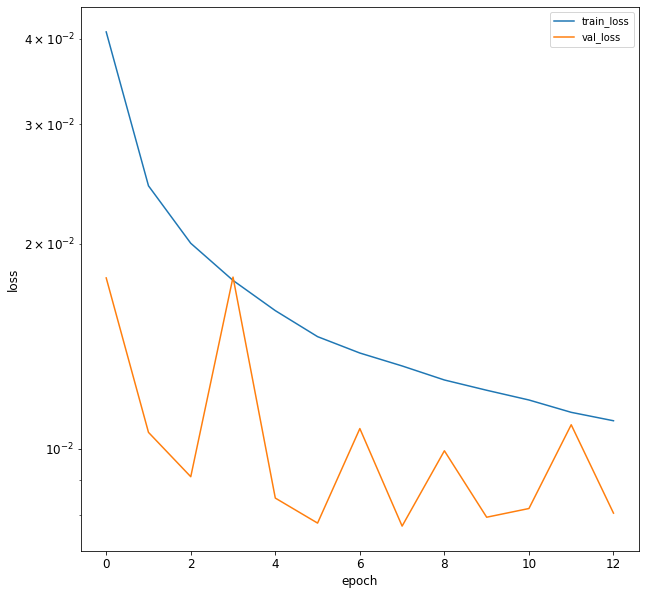

In [132]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [86]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# # Save the weights
# path = '/content/drive/MyDrive/Colab Notebooks/Weights/GRU/model.h5'
# model.save(path)

# **Evaluate the model**

**Load test data set**

In [133]:
#df_test = pd.read_csv(url11)
#df_test=pd.DataFrame(df_test)

In [134]:
#df_test=df_test.drop(0)
#df_test=df_test.head(200)
df_temp.loc[5000]

Date & Time         9/5/2021 2:40
Active Power               100.79
Forecasted Power           101.87
Name: 5000, dtype: object

In [135]:
test_set_1 = df_temp[10000:10500]  #10/1/2021 00:00 to 10/10/2021 23:50
test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

dataset_index=1

if dataset_index==1:
  df_test = test_set_1
elif dataset_index==2:
  df_test = test_set_2
elif dataset_index==3:
  df_test = test_set_3



In [136]:
col_1=(df_test.columns)[0]
col_2=(df_test.columns)[1]
col_3=(df_test.columns)[2]
feature = 'Active Power'
feature_1 = 'Forecasted Power'
df_test.rename(columns={col_1 :'Date & Time' , col_2 : feature ,col_3 :feature_1},inplace=True)

In [137]:
df_test=df_test.set_index('Date & Time')
#df_test = df_test.apply(pd.to_numeric)
#df_test=df_test.div(1000)

In [138]:
count = (df_test[feature] == 0).sum()
count

8

**Preprocessing technique**

In [139]:
#df_test[feature]=df_test[feature].replace(0,df_test[feature].median())
df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [140]:
scaler = MinMaxScaler()
test=pd.DataFrame(df_test[feature])
test[feature] = scaler.fit_transform(test)


In [141]:

test_shifted = test.copy()
test_shifted['y_t+1'] = test_shifted[feature].shift(-1)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted[feature].shift(T-t)
test_shifted = test_shifted.rename(columns={feature:'Original_active_power'})

forecasted_values=np.array(df_test[feature_1])
test_shifted[feature_1] = forecasted_values
#test_shifted

In [142]:
test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted['y_t+1'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], 20,20, 1)
#X_test

In [143]:
print(y_test.shape)
print(X_test.shape)

(100,)
(100, 20, 20, 1)


In [144]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

      0
0  0.46
1  0.44
2  0.45
3  0.54
4  0.51
..  ...
95 0.00
96 0.03
97 0.05
98 0.13
99 0.16

[100 rows x 1 columns]


In [145]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['Date & Time'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='Date & Time', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df['prediction'] =predictions 
eval_df[feature_1]=np.array(test_shifted[feature_1])
#eval_df

In [146]:
eval_df[['prediction']]=scaler.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scaler.inverse_transform(np.array(eval_df[['actual']]))
eval_df

,Date & Time,h,prediction,actual,Forecasted Power
0,10/12/2021 14:30,t+1,45.47,23.17,89.36
1,10/12/2021 14:40,t+1,43.84,27.32,89.36
2,10/12/2021 14:50,t+1,45.31,33.63,89.36
3,10/12/2021 15:00,t+1,53.91,38.72,89.36
4,10/12/2021 15:10,t+1,50.33,44.22,89.36
...,...,...,...,...,...
95,10/13/2021 6:20,t+1,0.10,15.97,89.36
96,10/13/2021 6:30,t+1,2.78,17.75,89.36
97,10/13/2021 6:40,t+1,5.27,19.74,89.36
98,10/13/2021 6:50,t+1,13.30,21.68,89.36


**MAPE of our model**

In [147]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = eval_df['actual']
pred = eval_df['prediction']

mape(actual, pred)

48.99067347618861

**RMSE of our model**

In [148]:
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

actual = eval_df['actual']
pred = eval_df['prediction']

rmse(actual, pred)

14.661321916348575

In [149]:
fig1 = px.line(eval_df,x='Date & Time', y=['actual',feature_1,'prediction'],labels={ "value": 'Active power (MW)'},title="GRU model:Expected vs predicted power forecasting") 
fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig1.show()

In [150]:
fig2 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="GRU model:Expected vs predicted power") 
fig2.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig2.show()

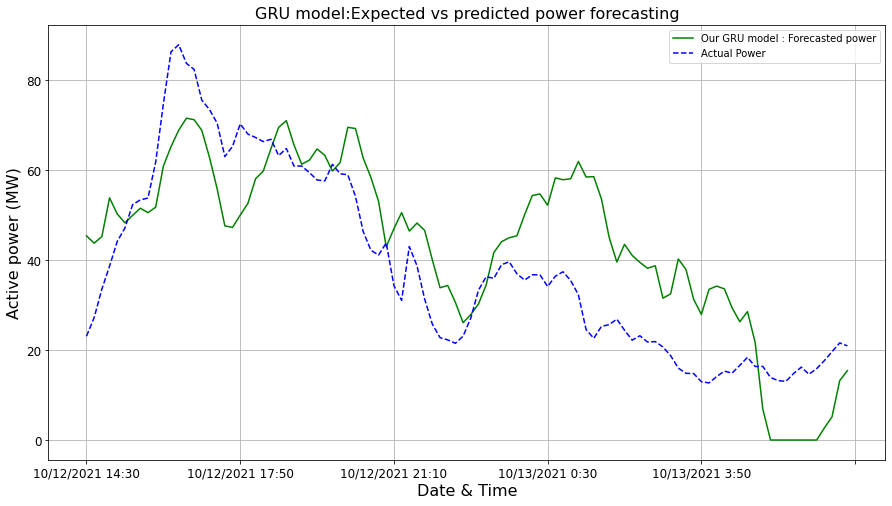

In [151]:
eval_df.plot(x='Date & Time', y=['prediction','actual'], style=['g','--b'],fontsize=12, figsize=(15, 8))
plt.title("GRU model:Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Our GRU model : Forecasted power', 'Actual Power'])
plt.savefig("GRU-results.pdf")
plt.savefig("GRU-results.png")
plt.show()

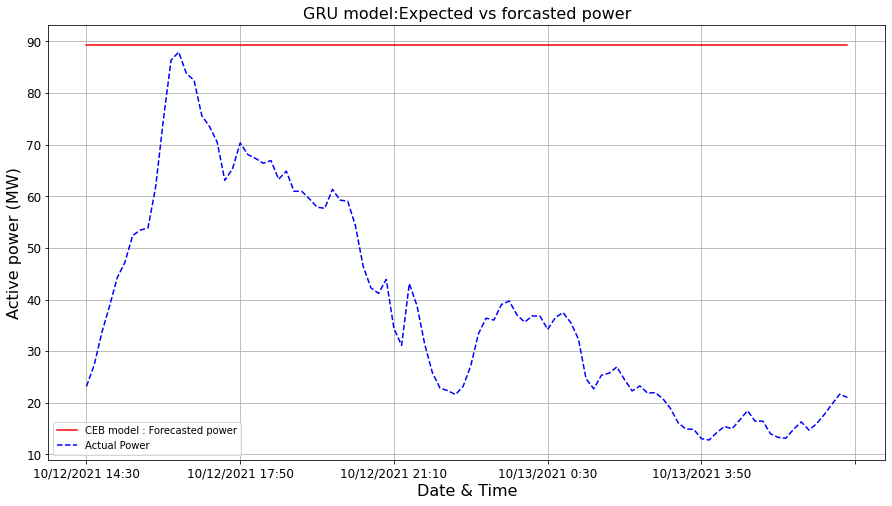

In [152]:
eval_df.plot(x='Date & Time', y=[feature_1, 'actual'], style=['r', '--b'],fontsize=12, figsize=(15, 8))
plt.title("GRU model:Expected vs forcasted power",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['CEB model : Forecasted power', 'Actual Power'])
plt.savefig("GRU-results-1.pdf")
plt.savefig("GRU-results-1.png")
plt.show()

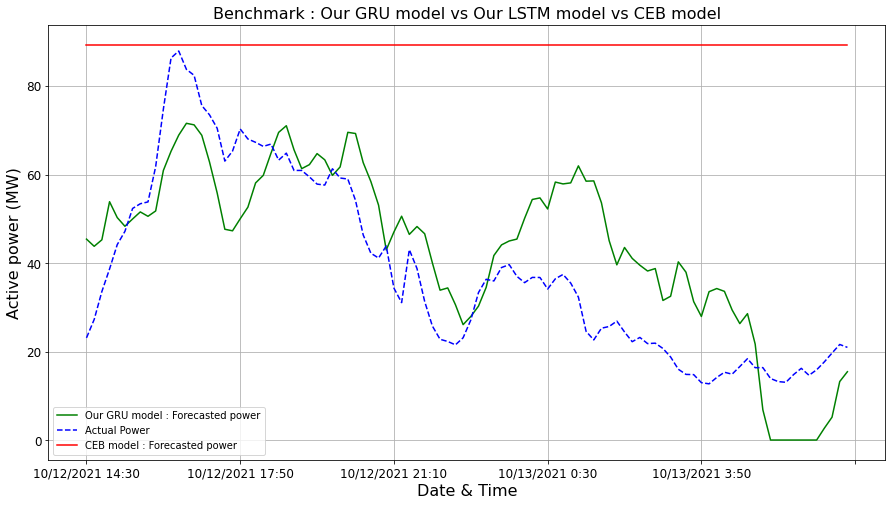

In [153]:
eval_df.plot(x='Date & Time', y=['prediction','actual',feature_1], style=['g','--b','r'],fontsize=12, figsize=(15, 8))
plt.title("Benchmark : Our GRU model vs Our LSTM model vs CEB model",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Our GRU model : Forecasted power','Actual Power','CEB model : Forecasted power'])
plt.savefig("benchmark.pdf")
plt.savefig("benchmark.png")
plt.show()